In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import cv2

## load the model and the image

In [ ]:
weights_path =os.path.join("/content/drive/MyDrive/project_data/yolov3.weights")
cfg_path =os.path.join("/content/drive/MyDrive/project_data/yolov3.cfg.txt")
net=cv2.dnn.readNetFromDarknet(cfg_path ,weights_path)
image_path =os.path.join("/content/drive/MyDrive/project_data/person_fall.jpg")
img = plt.imread(image_path)

## the human fall function

In [ ]:
def human_fall(img) :
  (H,W)=img.shape[:2]
  blob= cv2.dnn.blobFromImage(img,1/255.0,(416,416),crop=False,swapRB=False)
  net.setInput(blob)
  layers_output=net.forward(['yolo_82', 'yolo_94', 'yolo_106'])
  boxes=[]
  confidences=[]
  classIDs=[]
  for output in layers_output:
    for detection in output:
        scores=detection[5:]
        classID=np.argmax(scores)
        confidence=scores[classID]
        if classID==0 :
          if (confidence >0.4):
            box=detection[:4] * np.array([W,H,W,H])
            bx,by,bw,bh=box.astype("int")

            x=int(bx-(bw/2))
            y=int(by-(bh/2))

            boxes.append([x,y,int(bw),int(bh)])
            confidences.append(float(confidence))
            classIDs.append(classID)
  idx=cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)
  if len(idx)==0 :
    return img
  else :
      for i in idx.flatten():
        (x,y)=[boxes[i][0],boxes[i][1]]
        (w,h)=[boxes[i][2],boxes[i][3]]
        if h>w :
          cv2.rectangle (img,(x,y),(x+w ,y+h),(0,255,0),2)
        else :
          cv2.rectangle (img,(x,y),(x+w ,y+h),(255,0,0),2)
          cv2.putText(img,("fall detected"),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2)
  return img



## testing photo

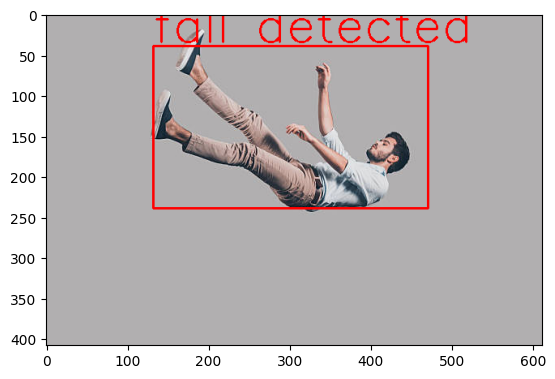

In [ ]:
image=human_fall(img)
plt.imshow(image)